In [1]:
# THIS SCRIPT PUTS THE FIRST CARBON C1 OF ALL THE CHAINS (OH-HEADED AND CH3-HEADED) AT THE SAME z-LEVEL
# CH3- AND OH- CHAINS HAVE THE SAME NUMBER OF CARBONS (20)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#!/usr/bin/env python

import numpy as np
import math
import matplotlib.pyplot as plt
import sys

In [3]:
Ncopies = 1 #number of unit cells

#next 4 lines were used to produce 25%"
Nx = 10 # number of gridpoints in x-direction (carbons)
Ny = 10 # number of gridpoints in y-direction (carbons)

Nxoxy = 5 # number of oxygens in x-direction 
Nyoxy = 5 # number of oxygens in y-direction 

# z coordinate of first layer molecules
zPos = 21.680

# set lattice vector length
a0 = 5.0

In [4]:
# Check percentage
Percentage = int(100*Nxoxy*Nyoxy/(float(Nx*Ny)))
print "Percentage wanted is", Percentage

Percentage wanted is 25


Vx= 5.0 Vy= 0
Wx= 2.5 Wy= 4.33012701892
xincrement=  2 yincrement=  2
Checking output...
number of oxygens 25
number of carbons 100
Percentage of output=  25


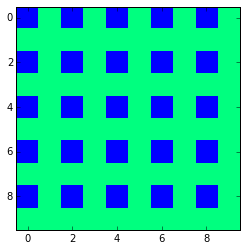

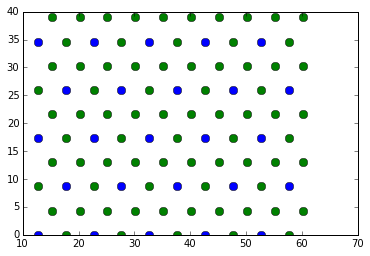

In [13]:
# make N copies of unit cell
Nx = Nx*Ncopies 
Ny = Ny*Ncopies 
Nxoxy = Nxoxy*Ncopies 
Nyoxy = Nyoxy*Ncopies 

# First basis vector V = (Vx,Vy)
Vx = a0
Vy = 0
print "Vx=",Vx, "Vy=", Vy

# Second basis vector W = (Wx,Wy)
Wx = a0*np.sin(np.pi/6)
Wy = a0*np.cos(np.pi/6)
print "Wx=",Wx, "Wy=", Wy


# create arrays to hold particle positions and types
xPos = np.zeros([Nx,Ny],dtype=float) # x positions of particles
yPos = np.zeros([Nx,Ny],dtype=float) # y positions of particles
pType = np.zeros([Nx,Ny],dtype=str) # particle type
zlastPos = np.zeros([Nx,Ny],dtype=float) # zlastPos ONLY will serve to calculate the box height (z)


# set all particle types to 'C' (carbon)
for i in range(Nx):
  for j in range(Ny):
    pType[i,j] = 'C' 


# set particle x- and y- coordinates
for j in range(Ny):
    for i in range(Nx):
        xPos[i,j] = i*Vx + j*Wx +12.68
        yPos[i,j] = i*Vy + j*Wy 
for j in range(Ny):
    for i in range(Nx):  # Here we move the last particles of almost each line to get a more rectangular surface shape
        if xPos[i,j]>xPos[-1,1]:
           xPos[i,j] = xPos[i-Nx+1,j-2]
            
            
# exchange particles (oxygens for carbons)
#    Get indices of particles to replace:
xincrement = Nx/Nxoxy
yincrement = Ny/Nyoxy
print "xincrement= ", xincrement, "yincrement= ", yincrement
pType_boolean = np.ones([Nx,Ny],dtype=int) # array with 0 for oxygen and 1 for carbon (for plotting)
n=0
for k in range(0,Nx,xincrement):
    for l in range(0,Ny,yincrement):
        pType[k,l] = 'O'
        pType_boolean[k,l] = 0
        n = n+1
        
# Checking output
print "Checking output..."
print "number of oxygens",n
print "number of carbons", Nx*Ny
pc = n/(float(Nx)*float(Ny))
print "Percentage of output= ", int(pc*100)




#Z = np.zeros([Nx,Ny],dtype=int)
#for i in range(Nx):
#  for j in range(Ny):
#    if pType[i,j] == 'C':
#      Z[i,j] = 1

#   plot
#    first we plot the heatmap
fig, ax = plt.subplots()
ax.imshow(pType_boolean, cmap=plt.cm.winter, interpolation='nearest')
#fig.savefig('output_' + str(Percentage) + '_heatmap.pdf',format='pdf')

#    then we plot the actual positions
SizeOfDots = 8
fig, ax = plt.subplots()
for i in range(Nx):
  for j in range(Ny):
    if pType[i,j] == 'O':
      ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='blue')
    else:
      ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='green')
#ax.set_xlim(xPos[0,0]-0.5,xPos[-1,-1]+0.5)
#ax.set_ylim(yPos[0,0]-0.5,yPos[-1,-1]+0.5)
plt.show()
#fig.savefig('output_' + str(Percentage) + '_positions.pdf',format='pdf')

In [14]:
print pType_boolean

[[0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1]]


In [5]:
# WARNING!!!! THIS CELL HAS TO RUN 2 TIMES TO GET THE CORRECT VALUES (see comment of zbox)

%cd /Users/burbol/Desktop/scripts/SAM_CREATION/SAMs
#############################################  PDB FILE WRITTING    ###################################################
xbox = round(xPos.max()-xPos.min()+(a0*0.5),3)
ybox = round(yPos.max()-yPos.min()+a0,3)
zbox = round(zPos,3)-zlastPos.min() #zlastPos doesn't get a value until the end of this cell => run 2 times!
title = 'sam ' + str(int(pc*100)) + '% OH-coverage'
f = open('start' + str(int(pc*100)) + '.pdb','w')
# save the particle types and positions
f.write('TITLE     ' + title + '\n')
f.write('REMARK    THIS IS A SIMULATION BOX' + '\n')
f.write("CRYST1  %3.3f  %3.3f  %3.3f  90.00  90.00  90.00 P 1           1"%(xbox,ybox,zbox) + '\n')
f.write('MODEL        1' + '\n')
    
def printline(totalpos, atomnum, chaintype, chainNum, x, y, z):
    occupancy=1.00
    temp=0.00
    # save the particle types and positions
    f.write( "%-6s%5d %4s%1s%3s %1s%4d%1s   %8.3f%8.3f%8.3f%6.2f%6.2f          %2s%2s"%("ATOM ", totalpos, atomnum, '',chaintype,'',chainNum,'', x, y, z, occupancy, temp,'','' + '\n'))
    

################# Head Groups  ##################


####  SAMs Head Groups  TOP ####

xLengthCHTOP = -0.09
yLengthCHTOP = 0.00
zLengthCHTOP = +0.99

####  OAM Head Groups  TOP ####

xLengthCO = -0.22
yLengthCO = 0.00
zLengthCO = -1.42

xLengthOH = +0.87
yLengthOH = 0.00
zLengthOH = +0.39    

############## SAM & OAM CHAINS ##############
xLengthCCa = -1.40
yLengthCCa = 0.00
zLengthCCa = -0.64

xLengthCH1a = -0.50
yLengthCH1a = +0.81
zLengthCH1a = +0.29

xLengthCH2a = -0.50
yLengthCH2a = -0.810
zLengthCH2a = +0.29

xLengthCCb = +0.15
yLengthCCb = 0.00
zLengthCCb = -1.53

xLengthCH1b = +0.50
yLengthCH1b = +0.81
zLengthCH1b = -0.29

xLengthCH2b = +0.50
yLengthCH2b = -0.810
zLengthCH2b = -0.29

####  Head Groups  BOTTOM  (a) ####

xLengthCHBOTTOM = 0.10
yLengthCHBOTTOM = 0.00
zLengthCHBOTTOM = -0.99


# We start all the counters
chainlength = 65
totalpos=1
chainNum = 0
indexH = 1
indexC = 1
indexO = 1


# First we write the top Head Group
for i in range(Nx):
  for j in range(Ny): 
        chainNum = chainNum +1
        xoldC= round(xPos[i,j],3)
        yoldC= round(yPos[i,j],3)
        zoldC= zPos
        atomtype = pType[i,j]
        indexC = 1
        indexO = 1        
        indexH = 1
        if atomtype == 'O':    #OXYGEN CHAIN
            chainlength = 63
            chaintype='OAM'
            atomnum=str(atomtype)+str(indexC)
            xnew = xoldC 
            ynew = yoldC 
            znew = zoldC - zLengthCO
            printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew)  # O1
            totalpos = totalpos + 1
            #Third H atom (H3) in OAM
            atomtype = 'H'
            atomnum=str(atomtype)+str(indexH)
            xnew = xoldC + xLengthOH
            ynew = yoldC + yLengthOH
            znew = zoldC + zLengthOH - zLengthCO
            printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew) #H1 (in OAM)
            totalpos = totalpos + 1
            indexH = indexH + 1 
            xFirstC = xLengthCO
            yFirstC = yLengthCO
            zFirstC = zLengthCO - zLengthCO
        elif atomtype == 'C':    #CARBON CHAIN parameters
        #Third H atom (H3)
            chainlength = 65
            chaintype='SAM'
            xFirstC = 0.00
            yFirstC = 0.00
            zFirstC = 0.00
                        
        # At the beginning of each chain we write a Head Group (TOP)
        #First Carbon   
        atomtype = 'C'
        #f.write("in loop " + str(d)  + '\n')
        atomnum=str(atomtype)+str(indexC)
        xnew = xoldC + xFirstC
        ynew = yoldC + yFirstC
        znew = zoldC + zFirstC
        printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew) #C1
        totalpos = totalpos + 1
        indexC = indexC + 1
        xoldC=xnew
        yoldC=ynew
        zoldC=znew
        #First H atom (H1)
        atomtype = 'H'
        atomnum=str(atomtype)+str(indexH)
        xnew = xoldC + xLengthCH1b
        ynew = yoldC + yLengthCH1b
        znew = zoldC + zLengthCH1b
        printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew) #H1
        totalpos = totalpos + 1
        indexH = indexH + 1
        #Second H atom (H2)
        atomtype = 'H'
        atomnum=str(atomtype)+str(indexH)
        xnew = xoldC + xLengthCH2b
        ynew = yoldC + yLengthCH2b
        znew = zoldC - xLengthCH2b
        printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew) #H2
        totalpos = totalpos + 1
        indexH = indexH + 1  
        if chaintype=='SAM':
            #Third H atom (H3)
            atomtype = 'H'
            atomnum=str(atomtype)+str(indexH)
            xnew = xoldC + xLengthCHTOP
            ynew = yoldC + yLengthCHTOP
            znew = zoldC + zLengthCHTOP
            printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew) #H3 (only in SAM)
            totalpos = totalpos + 1
            indexH = indexH + 1  
            chainlength = 65
            chaintype='SAM'
            xFirstC = 0.00
            yFirstC = 0.00
            zFirstC = 0.00
          
        #here comes the "body" of the chain
        #while totalpos <= (totalpos+chainlength-5):
        for d in range(9): 
            #First Carbon
            atomtype = 'C'
            #f.write("in loop " + str(d)  + '\n')
            atomnum=str(atomtype)+str(indexC)
            xnew = xoldC + xLengthCCa
            ynew = yoldC + yLengthCCa
            znew = zoldC + zLengthCCa
            printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew) #C2
            totalpos = totalpos + 1
            indexC = indexC + 1
            xoldC=xnew
            yoldC=ynew
            zoldC=znew
            #First H atom (H1)
            atomtype = 'H'
            atomnum=str(atomtype)+str(indexH)
            xnew = xoldC + xLengthCH1a
            ynew = yoldC + yLengthCH1a
            znew = zoldC + zLengthCH1a
            printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew) 
            totalpos = totalpos + 1
            indexH = indexH + 1
            #Second H atom (H2)
            atomtype = 'H'
            atomnum=str(atomtype)+str(indexH)
            xnew = xoldC + xLengthCH2a
            ynew = yoldC + yLengthCH2a
            znew = zoldC + zLengthCH2a
            printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew)
            totalpos = totalpos + 1
            indexH = indexH + 1
            #There are two different vectors C-C, so we need to alternate them
            #Second Carbon
            atomtype = 'C'
            atomnum=str(atomtype)+str(indexC)
            xnew = xoldC + xLengthCCb
            ynew = yoldC + yLengthCCb 
            znew = zoldC + zLengthCCb
            printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew) #C3
            totalpos = totalpos + 1
            indexC = indexC + 1
            xoldC=xnew
            yoldC=ynew
            zoldC=znew
            #First H atom (H1)
            atomtype = 'H'
            atomnum=str(atomtype)+str(indexH)
            xnew = xoldC + xLengthCH1b
            ynew = yoldC + yLengthCH1b
            znew = zoldC + zLengthCH1b
            printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew)
            totalpos = totalpos + 1
            indexH = indexH + 1
            #Second H atom (H2)
            atomtype = 'H'
            atomnum=str(atomtype)+str(indexH)
            xnew = xoldC + xLengthCH2b
            ynew = yoldC + yLengthCH2b
            znew = zoldC + zLengthCH2b
            printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew)
            totalpos = totalpos + 1
            indexH = indexH + 1
        # At the end of each chain we also write a Head Group (BOTTOM)
        #First Carbon
        atomtype = 'C'
        atomnum=str(atomtype)+str(indexC)
        xnew = xoldC + xLengthCCa
        ynew = yoldC + yLengthCCa
        znew = zoldC + zLengthCCa
        #f.write("First carbon BOTTOM " + '\n')
        printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew)
        totalpos = totalpos + 1
        xoldC=xnew
        yoldC=ynew
        zoldC=znew
        #First H atom (H1)
        atomtype = 'H'
        #f.write("First H BOTTOM " + '\n')
        atomnum=str(atomtype)+str(indexH)
        xnew = xoldC + xLengthCH1a
        ynew = yoldC + yLengthCH1a
        znew = zoldC + zLengthCH1a
        printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew)
        totalpos = totalpos + 1
        indexH = indexH + 1
        #Second H atom (H2)
        atomtype = 'H'
        atomnum=str(atomtype)+str(indexH)
        xnew = xoldC + xLengthCH2a
        ynew = yoldC + yLengthCH2a
        znew = zoldC + zLengthCH2a
        #f.write("Second H BOTTOM " + '\n')
        printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew)
        totalpos = totalpos + 1
        indexH = indexH + 1
        #Third H atom (H3)
        atomtype = 'H'
        atomnum=str(atomtype)+str(indexH)
        xnew = xoldC + xLengthCHBOTTOM       
        ynew = yoldC + yLengthCHBOTTOM
        znew = zoldC + zLengthCHBOTTOM
        #f.write("Third H BOTTOM " + '\n')
        printline(totalpos, atomnum, chaintype, chainNum, xnew, ynew, znew)
        totalpos = totalpos + 1
        indexH = indexH + 1 
        zlastPos[i,j] = znew
f.close()

/Users/burbol/Desktop/scripts/SAM_CREATION/SAMs


In [ ]:
# Other coordinates (symmetric)
#Vx = a0*np.sin(np.pi/6)
#Vy = a0*np.cos(np.pi/6)
#Wx = -a0*np.sin(np.pi/6)
#Wy = a0*np.cos(np.pi/6)